## Hypothesis testing and Student's T-test

### Intro

The majority of scientific studies formulate hypotheses---statement about the nature of some phenomena---and rigorously test them.
Statistical tests measure the probability of observed or collected data given a specific hypothesis.
If the probability of observing your data is small, then we can refute our given hypothesis for a more probable alternative. 

### The data
We'll use data from the [COVID tracking project](https://covidtracking.com/) on the fraction of positive COVID-19 tests across all US states.
US states will be our observations and grouped into four regions: West, South, Northeast, and Midwest.
Before we develop a hypothesis about the rate of COVID-19 between regions of the US, lets explore the data. 

### Exploratory Data Analysis

Below we read the data from an application programming interface ([API](https://en.wikipedia.org/wiki/API)) provided by developers at the covidtracking project, and merge that data with a second dataset linking states to their census region (West, South, Northeast, and Midwest).

The fraction of positive cases is computed for each state and a [boxplot](https://en.wikipedia.org/wiki/Box_plot#:~:text=In%20descriptive%20statistics%2C%20a%20box,whisker%20plot%20and%20box%2Dand%2D) is generated that includes the median, 25th and 75th percentile of the fraction of positive cases at the state level. 

In [55]:
data = pd.read_csv("https://api.covidtracking.com/v1/states/current.csv") # read data from covidtracking api
data["fracPos"] = data.positive/ data.totalTestResults # comppute the fraction of positive tests 

# read in data linking states to their census regions
censusRegions = pd.read_csv("https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv")

# To merge two data sets we can use the "merge" function from pandas (pd.).
# Two datasets are merged by matching up a key (list of variables in your dataset)
# from one data set with a key from another. 


In [56]:
#dataset one has the following rows and columns
print("Data set one")
data.head(3)

Data set one


,date,state,positive,probableCases,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,...,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,fracPos
0,20201013,AK,11039,NaN,503750,NaN,514789,59.0,NaN,NaN,...,0,0,881fbdb23caeb53c47e5007c8599ec1624e1c68d,0,0,0,0,0,NaN,0.021444
1,20201013,AL,167193,20110.0,1074124,NaN,1221207,823.0,18440.0,NaN,...,0,261,19ea68f7f6d374d276ce094b7473ceb24e9e0cae,0,0,0,0,0,NaN,0.136908
2,20201013,AR,94167,4816.0,1073314,NaN,1162665,601.0,6069.0,246.0,...,25,109,bacc62043d22c514733768a48aecdc636d18ee3c,0,0,0,0,0,NaN,0.080992


In [57]:
#dataset two has the following rows and columns
print("Data set two")
censusRegions.head(3)

Data set two


,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central


We want to connect data set one (DS1) one with DS2 by state---a variable that is unique to each observation and that both data sets have in common. 

(-0.01, 0.16)

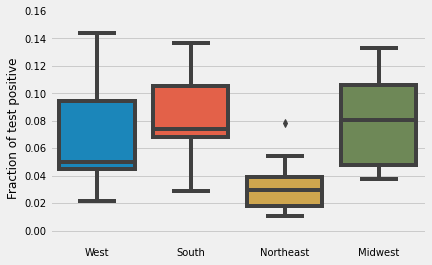

In [58]:
data = data.merge(censusRegions
            ,left_on="state"        # The variable name in DS1
            ,right_on="State Code") # The variable name in DS2

# build plot
import seaborn as sns                                   # a module with great looking plots
plt.style.use("fivethirtyeight")                        # a nice-looking style
fig,ax = plt.subplots()                                 # set up a figure and axis for plotting 
sns.boxplot( x = "Region", y= "fracPos", data=data )       # plot a box plot using the seaborn module  

ax.set_xlabel("")                                       # exclude an x label
ax.set_ylabel("Fraction of test positive",fontsize=12)  # label the vertical axis

ax.tick_params(labelsize=10)                            # change the size of the x and y ticks 

ax.set_ylim(-0.01,0.16)

### Building a formal hypothesis (and continuing our example). 

From our exploratory analysis above we see the fraction of positive tests is smaller in the Northeast than in other census regions of the US. 
We also see that the fraction of positive cases in the Northeast is small. 

A first hypothesis might be 

*States in the northeast have a fraction of positive tests that is approximately zero*

and a second hypothesis

*States in the northeast have a smaller fraction of positive tests compared to states from all other census regions combined*

But to formally test a hypothesis we need to develop a **null hypothesis**.
A **null hypothesis $(H_{0})$** is a claim you want to refute by gathering data that suggests this hypothesis is improbable and you **alternative hypothesis $(H_{\text{A}})$**---or all possible hypothesis other than your null hypothesis---is more likely. 

Continuing with our example, I might state my **null hypothesis** as 

$H_{0}:$ *States in the northeast have the same fraction of positive tests compared to states from all other census regions combined*

and so my **alternative hypothesis** is 

$H_{\text{A}}:$ *States in the northeast DO NOT have the same fraction of positive tests compared to states from all other census regions combined*

### The 5 parts of a hypothesis

There are at minimum five parts to any formal Hypothesis test. 

#### Step 1: Generate a null and alternative hypothesis.

This involves a claim and its alternative written as clear as possible. 
When possible and often, null and alternative hypothesis describe claims about population parameters.   

For example, a null hypothesis may state the population mean is equal to a constant. 

\begin{align}
    H_{0}: \mu_{A} = \mu_{0} \\ 
    H_{\text{A}}: \mu_{A} \neq \mu_{0} 
\end{align}

where $\mu_{0}$ is a constant. 

As a second example, a null hypothesis may state that the population mean is the same between two groups (group A and group B), and so the alternative hypothesis would be all outcomes where the population means are unequal. 
Using mathematical notation we can write

\begin{align}
    H_{0}: \mu_{A} = \mu_{B} \\ 
    H_{\text{A}}: \mu_{A} \neq \mu_{B} 
\end{align}

##### Our example

For our example above, we may state our null hypothesis for the first claim as 

\begin{align}
    H_{0}: \mu_{\text{Northeast}} = 0 \\ 
    H_{\text{A}}: \mu_{\text{Northeast}} \neq 0
\end{align}
where $\mu$ is the average fraction of positive tests.  

and for our second claim we may state our null hypothesis as 

\begin{align}
    H_{0}: \mu_{\text{Northeast}} = \mu_{\text{Not Northeast}} \\ 
    H_{\text{A}}: \mu_{\text{Northeast}} \neq \mu_{\text{Not Northeast}} 
\end{align}
where $\mu$ is the average fraction of positive tests.  

#### Step 2: Define a significance level

The next step is to define a level $\alpha$ that if the probability your observed data occurred given your **null hypothesis** is smaller than $\alpha$ than you will reject your null hypothesis in favor of the alternative.

A common, but not always used, choice for $\alpha$ is 0.05. 
That is, if the probability of observing our data---given the null hypothesis is true---is less than 0.05 then we will reject our null hypothesis. 

##### Our example
Let's set $\alpha = 0.05$. 

#### Step 3: Test statistic (a way to define probable and improbable observed data)

A **test statistic** is a method of computing the probably of observing our dataset if the null hypothesis were true. 
There are many standard test statistics and they are almost always related to the parameters you used to specify your hypothesis in Step 1. 

##### Our example

For our first example we defined our hypothesis using a population mean and so it is natural to define a test statistic that computes the probability of observing our sample mean given our null hypothesis is true.  

Our null hypothesis states that the population mean for the northeast is equal to 0.

We know from the Central Limit Theorem that we can approximate the sampling distribution of the mean with a Normal distribution centered on the sample mean and with variability equal to the standard error: the observed standard deviation divided by the square root of the number of observations. 

\begin{align}
    \mu_{\text{Northeast}} \sim \mathcal{N}\left( \bar{x}, \frac{\sigma}{\sqrt{N}}  \right)
\end{align}

where $N$ is the number of states in the Northeast.

A reasonable test statistic may then be the distance between our null hypothesis mean and our observed mean in terms of standard deviations.

\begin{align}
    t = \frac{\bar{x} - \mu_{0}}{  \sigma \Big / \sqrt{N}  }
\end{align}

The statistic $t$ measures the number of standard deviations our observed mean is from our  supposed (null) mean.

##### Our example
In our example we need to compute the mean fraction of positive cases in the northeast and the standard error. 

In [59]:
neRegion  = data.loc[data.Region=="Northeast"] # using the loc function to find all rows where the region equals "Northeast"

meanNeFracPos = np.mean(neRegion.fracPos)
print("Observed average fraction positive in Northeast")
print("{:.3f}".format(meanNeFracPos))

stdDevNeFracPos = np.std( neRegion.fracPos )
print("Observed standard deviation fraction positive in Northeast")
print("{:.3f}".format(stdDevNeFracPos))

numOfStates = len(neRegion)
print("Observed number of states in northeast")
print("{:.3f}".format(numOfStates))

seNeFracPos = stdDevNeFracPos/ np.sqrt(numOfStates)
print("Observed standard error")
print("{:.3f}".format(seNeFracPos))

print("Our test statistic")
t = meanNeFracPos/seNeFracPos
print("{:.3f}".format(t))

Observed average fraction positive in Northeast
0.034
Observed standard deviation fraction positive in Northeast
0.020
Observed number of states in northeast
9.000
Observed standard error
0.007
Our test statistic
4.955


#### Step 4: Evaluate the observed data given our null hypothesis and test statistic (the infamous p-value)

One way to evaluate how unusual it would be to observe our data given the null hypothesis is to measure the probability we would see values more extreme than our computed statistic $t$. 
If the probability is small that we would see values more extreme than our test statistic than it is likely the null hypothesis is wrong. 

We need to compute
\begin{align}
    p(T > t \text{ or } T < t | H_{0} \text{ is true})
\end{align}

where $T$ is the distribution of values if the null hypothesis were true. 

In [60]:
import scipy.stats

normalDist = scipy.stats.norm

probGreaterThanT = 1 - normalDist(0, seNeFracPos).cdf( t )
probLessThanNegativeT = normalDist(0, seNeFracPos).cdf( -t )

probabilityMoreExtremeThanT = probGreaterThanT + probLessThanNegativeT

print("The probability of finding a value more extreme than t, given the null hypothesis is true is {:.4f}".format(probabilityMoreExtremeThanT))

The probability of finding a value more extreme than t, given the null hypothesis is true is 0.0000


#### Step 5: Drawing a conclusion

The final step is to compare the probability of observing your test statistic given the null hypothesis was true to your significance level (in step 2). 

We set $\alpha = 0.05$ and since the probability of finding a t value more extreme than 4.95 is much less than 0.05 it is unlikely the null hypothesis is true. 
It is likely that the average fraction of positive cases is significantly different than 0. 


## Under construction below!

For our second example, our null hypothesis states that the population means for the northeast and all other regions are equal.
In other words the *difference* between the average fraction of positive cases in the Northeast and all other regions is equal to zero 

\begin{align}
    \delta = \mu_{\text{Northeast}} - \mu_{\text{Not Northeast}} = 0
\end{align}

Defining this difference may give us an idea about how to define our test statistic. 
We can compare the observed difference between the average fraction of positive cases in the Northeast and other regions to our null hypothesis difference. 

\begin{align}
    d - \delta
\end{align}

where $d$ is the observed difference computed from the data. 
Lets compute the above. 

In [61]:
neRegion  = data.loc[data.Region=="Northeast"] # using the loc function to find all rows where the region equals "Northeast"

# using the loc function to find all rows where the region does not equal "Northeast"
allOthers = data.loc[data.Region!="Northeast"]

meanNeFracPos = np.mean(neRegion.fracPos)
print("Observed average fraction positive in Northeast")
print("{:.3f}".format(meanNeFracPos))

meanAllOtherFracPos = np.mean(allOthers.fracPos)
print("Observed average fraction positive in All other regions")
print("{:.3f}".format(meanAllOtherFracPos))

d = meanNeFracPos - meanAllOtherFracPos
print("Observed difference in avg fraction positive")
print("{:.3f}".format(d))

Observed average fraction positive in Northeast
0.034
Observed average fraction positive in All other regions
0.078
Observed difference in avg fraction positive
-0.044


But there is a problem with our proposed test statistic. 
We don't know how variable it is. 
If we collected another sample would the mean change? By how much?
By enough so that the difference is always less than 0?

We know from the Central Limit Theorem that we can approximate the sampling distribution of the mean with a Normal distribution centered on the sample mean and with variability equal to the standard error: the observed standard deviation divided by the square root of the number of observations. 

\begin{align}
    
\end{align}

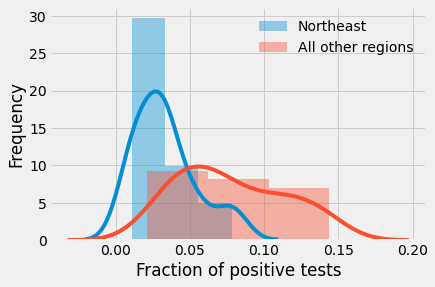

In [62]:



fig,ax = plt.subplots()
sns.distplot( ne.fracPos,3, label = "Northeast",ax=ax )
sns.distplot( so.fracPos,3, label = "All other regions",ax=ax )

ax.set_xlabel("Fraction of positive tests")
ax.set_ylabel("Frequency")

ax.legend(frameon=False)